## 3.Gradient boosting

#### (1) Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

#### (2) Load dataset for implementation
###### - load PimaIndianDiabetes dataset and split

In [2]:
Ploan = pd.read_csv("Personal Loan.csv")

x_vars = np.array(['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'])

Ploan_X = Ploan[x_vars]
Ploan_Y = Ploan['Personal Loan']

n_train = 1500

GBM_tr_X, GBM_ts_X, GBM_tr_Y, GBM_ts_Y = train_test_split(Ploan_X, Ploan_Y, train_size=n_train)

#### (3) Learning Gradient boosting classifier

In [3]:
GBM_model = GradientBoostingClassifier( learning_rate=0.02, n_estimators=1000, subsample=0.8)
GBM_model.fit(GBM_tr_X, GBM_tr_Y)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### (4) Experimental result

In [4]:
pred_tr = GBM_model.predict(GBM_tr_X)
x_tr = confusion_matrix(GBM_tr_Y, pred_tr)
print("Train ACC = ", np.diag(x_tr).sum()/np.sum(x_tr))

pred_ts = GBM_model.predict(GBM_ts_X)
x_ts = confusion_matrix(GBM_ts_Y, pred_ts)
print("Test ACC = ", np.diag(x_ts).sum()/np.sum(x_ts))

Train ACC =  1.0
Test ACC =  0.981


#### (5) Plotting variable importance

<BarContainer object of 11 artists>

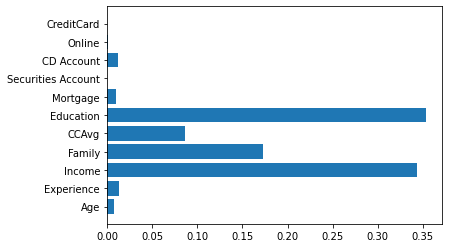

In [5]:
feature_importance = GBM_model.feature_importances_

plt.barh(['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'], feature_importance)